## 讀取資料

In [ ]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## 資料前處理

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255.0
x_ttest = x_test / 255.0

from tensorflow.keras import utils
y_train_ = utils.to_categorical(y_train, 10)
y_test_ = utils.to_categorical(y_test, 10)

## 選擇優化器

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense: x * w + b

# 784 (28 * 28) -> 256 (relu) -> 256 (relu) -> 10 (softmax)


def trainProcess(optimizer):
  model = Sequential()
  model.add(Dense(256, activation = 'relu', input_shape = (784,)))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  
  history = model.fit(x_train, y_train_,
                        batch_size=256,
                        epochs=10,
                        verbose=0,
                        validation_data=(x_test, y_test_)) 
  return history

In [ ]:
history1 = trainProcess('sgd')

In [ ]:
history2 = trainProcess('RMSprop')

In [ ]:
history3 = trainProcess('Adagrad')

In [ ]:
history4 = trainProcess('Adadelta')

In [ ]:
history5 = trainProcess('Adam')

## 評估優化器

In [ ]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

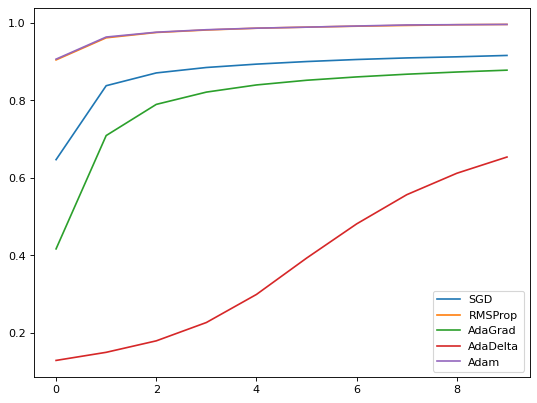

In [ ]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history.get('accuracy'), label='SGD')
plt.plot(history2.epoch, history2.history.get('accuracy'), label='RMSProp')
plt.plot(history3.epoch, history3.history.get('accuracy'), label='AdaGrad')
plt.plot(history4.epoch, history4.history.get('accuracy'), label='AdaDelta')
plt.plot(history5.epoch, history5.history.get('accuracy'), label='Adam')
plt.legend()
plt.show()